Code for scraping Harham.com German jobs

In [18]:
import requests, bs4, time
import pandas as pd
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup
from datetime import date
import os
import re
import matplotlib.pyplot as plt
import scraping_funcs_harnham as sf
import cleaning_funcs_harnham as cf

In [2]:
#urls for German data science jobs
links=[]
for i in range(1,4):
    url="https://www.harnham.com/jobs?options=1111,606&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=sf.extract_links(page_soup)
    for element in a:
        links.append(element)

#urls for UK marketing/insight jobs
for i in range(1,8):
    url="https://www.harnham.com/jobs?options=973,606&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=sf.extract_links(page_soup)
    for element in a:
        links.append(element)
            
#urls digital analytics
for i in range(1,5):
    url="https://www.harnham.com/jobs?options=1035,606&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=sf.extract_links(page_soup)
    for element in a:
        links.append(element)

#urls for data and technology jobs
for i in range(1,7):
    url="https://www.harnham.com/jobs?options=972,606&page="+str(i)+"&size=60"
    req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage=urlopen(req).read()
    page_soup = soup(webpage, "html.parser")
    a=sf.extract_links(page_soup)
    for element in a:
        links.append(element)
    


len(links)

127

In [3]:
# scrape all child pages    
info=pd.DataFrame(columns=("job_ref","job_title","location","salary","description","type"))
for urls in links:
        time.sleep(1) #ensuring at least 1 second between page grabs
        url="https://www.harnham.com"+urls
        req=Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        webpage=urlopen(req).read()
        page_soup = soup(webpage, "html.parser")
        df=pd.DataFrame()
        df['job_ref']=[sf.extract_jobref(page_soup)]
        df['job_title']=[sf.extract_job_title(page_soup)]
        df['location']=[sf.extract_location(page_soup)]
        df['salary']=[sf.extract_salary(page_soup)]
        df['description']=[sf.extract_description(page_soup)]
        df['type']=[sf.extract_type(page_soup)]
        info=info.append(df,ignore_index=True)


In [3]:
import os
os.getcwd()

'C:\\Users\\lundr\\DataScienceJobs\\notebooks'

In [2]:
import pickle

#info.to_pickle("C:/Users/lundr/DataScienceJobs/data/germany4novRaw.pkl")
info = pd.read_pickle("C:/Users/lundr/DataScienceJobs/data/germany4novRaw.pkl")

In [3]:
info.head(10)

,job_ref,job_title,location,salary,description,type
0,[65232/TS],DAS UNTERNEHMEN,[Hamburg],€70000 - €80000 per annum,['LEAD DATA SCIENTIST 70.000 - 80.000€ Hamburg...,Permanent
1,[65623/TS],4MAT,[Hamburg],€50000 - €60000 per annum,"['DATA SCIENTIST 50.000 - 60.000€ Hamburg, Ger...",Permanent
2,[64467/TS],4MAT,"[Dresden, Sachsen]",€70000 - €80000 per annum,['SENIOR DATA SCIENTIST 70.000 - 80.000€ Dresd...,Permanent
3,[67268/TS],4MAT,"[Münster, Nordrhein-Westfalen]",€90000 - €1000000 per annum,['LEAD DATA SCIENTIST90.000 - 100.000€ Essen u...,Permanent
4,[52899/MM],DATA ANALYST (w/m/d),"[Düsseldorf, Nordrhein-Westfalen]",€65000 - €75000 per annum + BENEFITS,"['DATA ANALYST (w/m/d)', 'Düsseldorf ', '65.00...",Permanent
5,[785978/MM],DATA SCIENTIST,"[Stuttgart, Baden-Württemberg]",€55000 - €65000 per annum + BENEFITS,"['DATA SCIENTIST ', 'STUTTGART ', '55.000 € - ...",Permanent
6,[157987],Machine Learning Engineer (m/f/d) - Urban Mobi...,[Berlin],€65000 - €85000 per annum,['Machine Learning Engineer (m/f/d) - Urban Mo...,Permanent
7,[161872],Team Lead - Returns Modeling,[Berlin],€66000 - €82000 per annum + benefits,"['Team Lead - Returns Modeling', 'Python, SQL,...",Permanent
8,[485966/MM],SENIOR DATA SCIENTIST (m/f/d),"[München (81249), Bayern]",€85000 - €100000 per annum + BENEFITS,"['SENIOR DATA SCIENTIST (m/f/d)', 'MUNICH', '8...",Permanent
9,[125896/MM],SENIOR DATA SCIENTIST (m/f/d),"[Frankfurt am Main, Hessen]",€75000 - €90000 per annum + BENEFITS,"['SENIOR DATA SCIENTIST (m/f/d)', 'HAMBURG', '...",Permanent


In [4]:
# run data cleaning functions
info['description']=cf.remove_duped_info(info['description'],[info['job_title'],info['location']])
info['description']=cf.clean_column(info['description'])
info['location']=cf.clean_column(info['location'])

info['salary_low'],info['salary_high']=cf.create_split_salary_range(info['salary'])
info['salary_low']=cf.clean_salary(info['salary_low'],'€')
info['salary_high']=cf.clean_salary(info['salary_high'],'€')


In [15]:
#add correct column headings and new columns
info.columns

info.columns = ['ref_code', 'job_title', 'location', 'salary', 'description', 'jobtype',
       'salary_low', 'salary_high','url']

In [24]:
import numpy as np
import datetime

#company: Company or recruiter advertising the job
info['company'] = 'Harnham'

#industry: which industry sector
    
info['industry'] = np.nan

#education: required level and subject of education

info['education'] = np.nan

#**career: **
info['career'] = np.nan

#duration: How long the job had been advertised for at time of scraping
info['duration'] = np.nan

#url infom was scraped from
#info['url'] = links
info['url'] = np.nan
#extraction date

info['salary_average'] = (info['salary_low']+info['salary_high'])/2


info['extraction_date'] = date.today()

In [25]:
info.head()

,ref_code,job_title,location,salary,description,jobtype,salary_low,salary_high,company,industry,education,career,duration,url,extraction_date,salary_average
0,[65232/TS],DAS UNTERNEHMEN,Hamburg,€70000 - €80000 per annum,lead data scientist - hamburg...,Permanent,70000,80000,Harnham,NaN,NaN,NaN,NaN,NaN,2019-11-04,75000.0
1,[65623/TS],4MAT,Hamburg,€50000 - €60000 per annum,data scientist - hamburg ger...,Permanent,50000,60000,Harnham,NaN,NaN,NaN,NaN,NaN,2019-11-04,55000.0
2,[64467/TS],4MAT,Dresden Sachsen,€70000 - €80000 per annum,senior data scientist - dresd...,Permanent,70000,80000,Harnham,NaN,NaN,NaN,NaN,NaN,2019-11-04,75000.0
3,[67268/TS],4MAT,Münster Nordrhein-Westfalen,€90000 - €1000000 per annum,lead data scientist - essen u...,Permanent,90000,65000,Harnham,NaN,NaN,NaN,NaN,NaN,2019-11-04,77500.0
4,[52899/MM],DATA ANALYST (w/m/d),Düsseldorf Nordrhein-Westfalen,€65000 - €75000 per annum + BENEFITS,düsseldorf - ...,Permanent,65000,75000,Harnham,NaN,NaN,NaN,NaN,NaN,2019-11-04,70000.0


In [6]:
#pickle the cleaned data
info.to_pickle("C:/Users/lundr/DataScienceJobs/data/germany4novCleaned.pkl")

'       python  sql  scikit-learn  keras  tensorflow  mxnet  pytorch  hive  spark  azure  emr  aws  google cloud  power bi  tableau  bi analysis    salary range: eur        -           berlin  germany         the company    leading consumer payment provider active in enabling a smooth and modern purchase experience for consumers and merchants is looking for a   with a focus on capability building and stakeholder management in the deployment of engines and algorithms for return transactions  the company offers unprecedented learning opportunities along the whole spectrum of bi analysis and data science in a devops and cloud environment and enables close interaction and collaboration with developers  technical and non-technical team members  the company also enjoys substantial and sustained growth in its user base          the role    this exciting opportunity as a   will have you oversee the design and deployment of advanced models for transaction classification and bring them to produc

In [7]:
# check for salary anomalies
info[info['salary_high']/info['salary_low']>3]
#correct the mistake
info.loc[info['salary_high']==max(info['salary_high']),'salary_high']=65000

Plot data

(array([ 6., 13., 38., 33., 18., 11.,  3.,  1.,  3.,  1.]),
 array([ 42500.,  51750.,  61000.,  70250.,  79500.,  88750.,  98000.,
        107250., 116500., 125750., 135000.]),
 <a list of 10 Patch objects>)

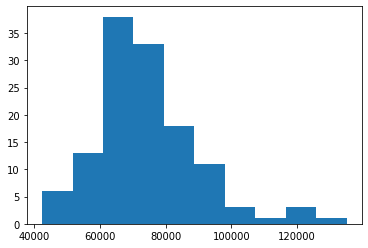

In [27]:
plt.hist(info['salary_average'])

In [36]:
#info.groupby(by='location').mean()['salary_average']

info.groupby(by='location').agg({'salary_average' : ['count','mean','median','min','max']})

salary_average                           \
                                             count           mean    median   
location                                                                      
  Augsburg  Bayern                               2   62500.000000   62500.0   
  Berlin                                        37   73576.770270   72000.0   
  Dresden  Sachsen                               1   75000.000000   75000.0   
  Duisburg  Nordrhein-Westfalen                  1   75000.000000   75000.0   
  Düsseldorf  Nordrhein-Westfalen                9   68055.555556   70000.0   
  Essen  Nordrhein-Westfalen                     1   77500.000000   77500.0   
  Frankfurt am Main  Hessen                      6   72916.666667   72500.0   
  Hamburg                                       21   78333.333333   75000.0   
  Heidelberg  Baden-Württemberg                  1   80000.000000   80000.0   
  Karlsruhe  Baden-Württemberg                   2   73750.000000   73750.0   
  Köln  Nordrhein-Westfalen                      3   70000.000000   70000.0   
  Munich  Bayern                                16   72281.250000   72500.0   
  München (     )  Bayern                       21   79523.809524   77500.0   
  Münster  Nordrhein-Westfalen                   1   77500.000000   77500.0   
  Nürnberg  Bayern                               1  135000.000000  135000.0   
  Stuttgart  Baden-Württemberg                   4   58500.000000   58750.0   

                                                         
                                          min       max  
location                                                 
  Augsburg  Bayern                    55000.0   70000.0  
  Berlin                              42500.0  105000.0  
  Dresden  Sachsen                    75000.0   75000.0  
  Duisburg  Nordrhein-Westfalen       75000.0   75000.0  
  Düsseldorf  Nordrhein-Westfalen     45000.0   85000.0  
  Essen  Nordrhein-Westfalen          77500.0   77500.0  
  Frankfurt am Main  Hessen           65000.0   82500.0  
  Hamburg                             55000.0  120000.0  
  Heidelberg  Baden-Württemberg       80000.0   80000.0  
  Karlsruhe  Baden-Württemberg        67500.0   80000.0  
  Köln  Nordrhein-Westfalen           65000.0   75000.0  
  Munich  Bayern                      44000.0  112500.0  
  München (     )  Bayern             55000.0  120000.0  
  Münster  Nordrhein-Westfalen        77500.0   77500.0  
  Nürnberg  Bayern                   135000.0  135000.0  
  Stuttgart  Baden-Württemberg        56500.0   60000.0